In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

# Set the seed
tf.random.set_seed(42)

# Установка параметров генератора данных
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Пути к папкам с данными
train_folder = "./train"
test_folder = "./test"

train_generator = train_datagen.flow_from_directory(
    train_folder,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical",
    seed=42
)

test_generator = valid_datagen.flow_from_directory(
    test_folder,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical",
    seed=42
)


Found 2244 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Создание модели CNN
model = Sequential()

# Слой свертки и слой пулинга
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

# Дополнительные слои свертки и пулинга для улучшения выделения признаков
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Сглаживание перед подачей в полносвязные слои
model.add(Flatten())

# Полносвязные слои
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Выходной слой с softmax для многоклассовой классификации

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Тренировка модели
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Оценка модели на тренировочном наборе
train_loss, train_accuracy = model.evaluate(train_generator)

print(f'Потери на тренировочном наборе: {train_loss}')
print(f'Точность на тренировочном наборе: {train_accuracy}')

Epoch 1/10
71/71 [==============================] - 94s 1s/step - loss: 1.1373 - accuracy: 0.4777 - val_loss: 0.9157 - val_accuracy: 0.5840
Epoch 2/10
71/71 [==============================] - 91s 1s/step - loss: 0.8545 - accuracy: 0.6185 - val_loss: 0.7337 - val_accuracy: 0.6960
Epoch 3/10
71/71 [==============================] - 92s 1s/step - loss: 0.7498 - accuracy: 0.6778 - val_loss: 0.7063 - val_accuracy: 0.7027
Epoch 4/10
71/71 [==============================] - 93s 1s/step - loss: 0.6678 - accuracy: 0.7103 - val_loss: 0.6778 - val_accuracy: 0.7333
Epoch 5/10
71/71 [==============================] - 92s 1s/step - loss: 0.6034 - accuracy: 0.7496 - val_loss: 0.7145 - val_accuracy: 0.7280
Epoch 6/10
71/71 [==============================] - 92s 1s/step - loss: 0.4797 - accuracy: 0.8146 - val_loss: 0.8340 - val_accuracy: 0.6947
Epoch 7/10
71/71 [==============================] - 92s 1s/step - loss: 0.3814 - accuracy: 0.8512 - val_loss: 0.8535 - val_accuracy: 0.7053
Epoch 8/10
71/71 [==

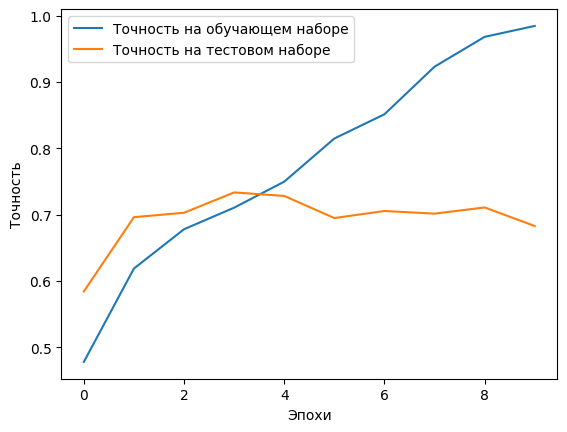

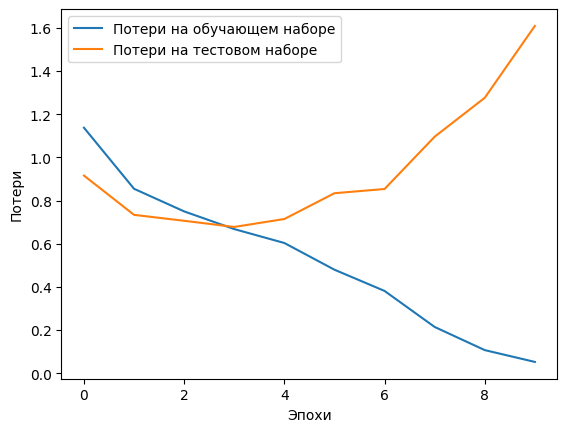

In [21]:
import matplotlib.pyplot as plt

# Визуализация процесса обучения

# График точности
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Точность на тестовом наборе')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], label='Потери на тестовом наборе')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 128)      

<Axes: title={'center': 'History ins_model'}, xlabel='epochs', ylabel='loss'>

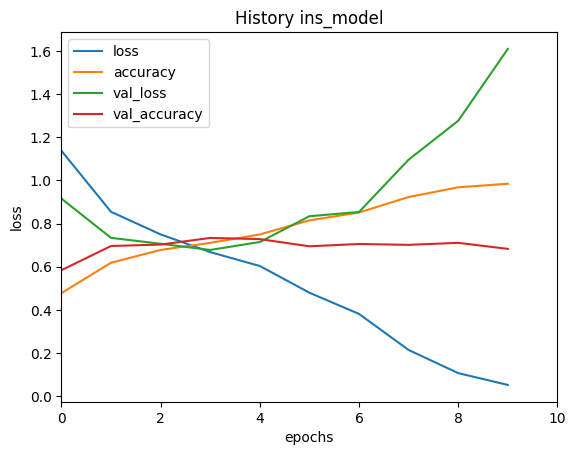

In [23]:
import pandas as pd
pd.DataFrame(history.history).plot(xlabel="epochs", 
ylabel="loss",title="History ins_model", xlim=(0,10))